In [ ]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

print("Tensorflow version{}".format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print(" Is GPU avilable: ", tf.config.list_physical_devices("GPU"))


Tensorflow version2.3.0
Eager mode:  True
 Is GPU avilable:  []


In [ ]:
# Data loadng and preprocessing
mnist = tf.keras.datasets.mnist
(image_train, label_train),(image_test, label_test) = mnist.load_data()
class_names = ["Zero","one","two","three",'four','five','six',"seven","eight","nine"]

In [ ]:
print("Data type", type(image_train))
print(image_train.shape)
print(image_test.shape)
print(label_train.shape)
print(label_test.shape)
np.unique(label_train)

Data type <class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

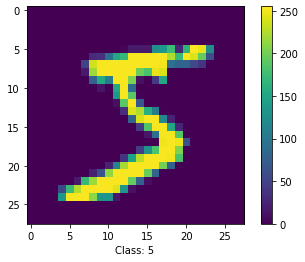

In [ ]:
plt.figure()
plt.imshow(image_train[0])
plt.colorbar()
plt.xlabel("Class: {} ".format(label_train[0]))
plt.show()

In [ ]:
# Data Preprocessing

#Normalization
image_train = image_train/255.0
image_test = image_test/255.0

In [ ]:
plt.figure()
plt.imshow(image_train[0])
plt.colorbar() # check color bar after normalization.
plt.xlabel("Class: {}".format(label_train[0]))
plt.show()

In [ ]:
# NN MODEL
model = keras.models  .Sequential([
  keras.layers.Flatten(input_shape=(28,28), name="Flat1"),
  keras.layers.Dense(100, activation=tf.nn.relu,name="dense1"),
  keras.layers.Dropout(0.2, name="drop_out"),
  keras.layers.Dense(100, activation=tf.nn.relu,name="dense2"),
  keras.layers.Dropout(0.2, name="drop_out_2"),
  keras.layers.Dense(10,activation=tf.nn.softmax,name="dense3")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flat1 (Flatten)              (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
drop_out (Dropout)           (None, 100)               0         
_________________________________________________________________
dense2 (Dense)               (None, 100)               10100     
_________________________________________________________________
drop_out_2 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense3 (Dense)               (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
__________________________________________________

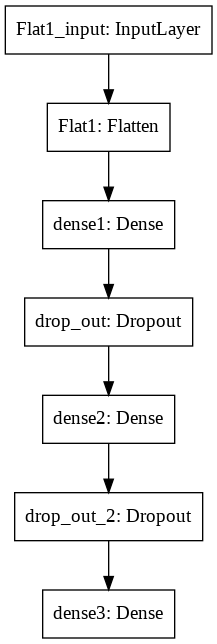

In [ ]:
# Show created Model as Graph

tf.keras.utils.plot_model(
    model, to_file="model.png", show_shapes = False, show_layer_names= True,
    rankdir="TB", expand_nested=False, dpi=96
)

In [ ]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.fit(image_train, label_train,epochs=28)

Epoch 1/28
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3007 - accuracy: 0.6248
Epoch 2/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7998 - accuracy: 0.7879
Epoch 3/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6058 - accuracy: 0.8397
Epoch 4/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4966 - accuracy: 0.8685
Epoch 5/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8880
Epoch 6/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8988
Epoch 7/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.9039
Epoch 8/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.9100
Epoch 9/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3276 - accuracy: 0.9119
Epoch 10/28
1875/1875 [==============================] - 4s 2ms/step - loss: 0.315

In [ ]:
test_loss, test_acc = model.evaluate(image_test,label_test)
print("Test accuracy: ",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9574
Test accuracy:  0.9574000239372253
